In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df = pd.read_excel("churn_prediction.xlsx")

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

there're 5630 values, some of them were missing

Keep a copy of original dataset just in case

In [6]:
dt= df.copy()

Remove CustomerID because we dont need them, I set inplace= True so we can see changes in df

In [7]:
df.drop('CustomerID', axis=1, inplace=True)

#### Outliners

Create a boxplot to see if we have any outliners

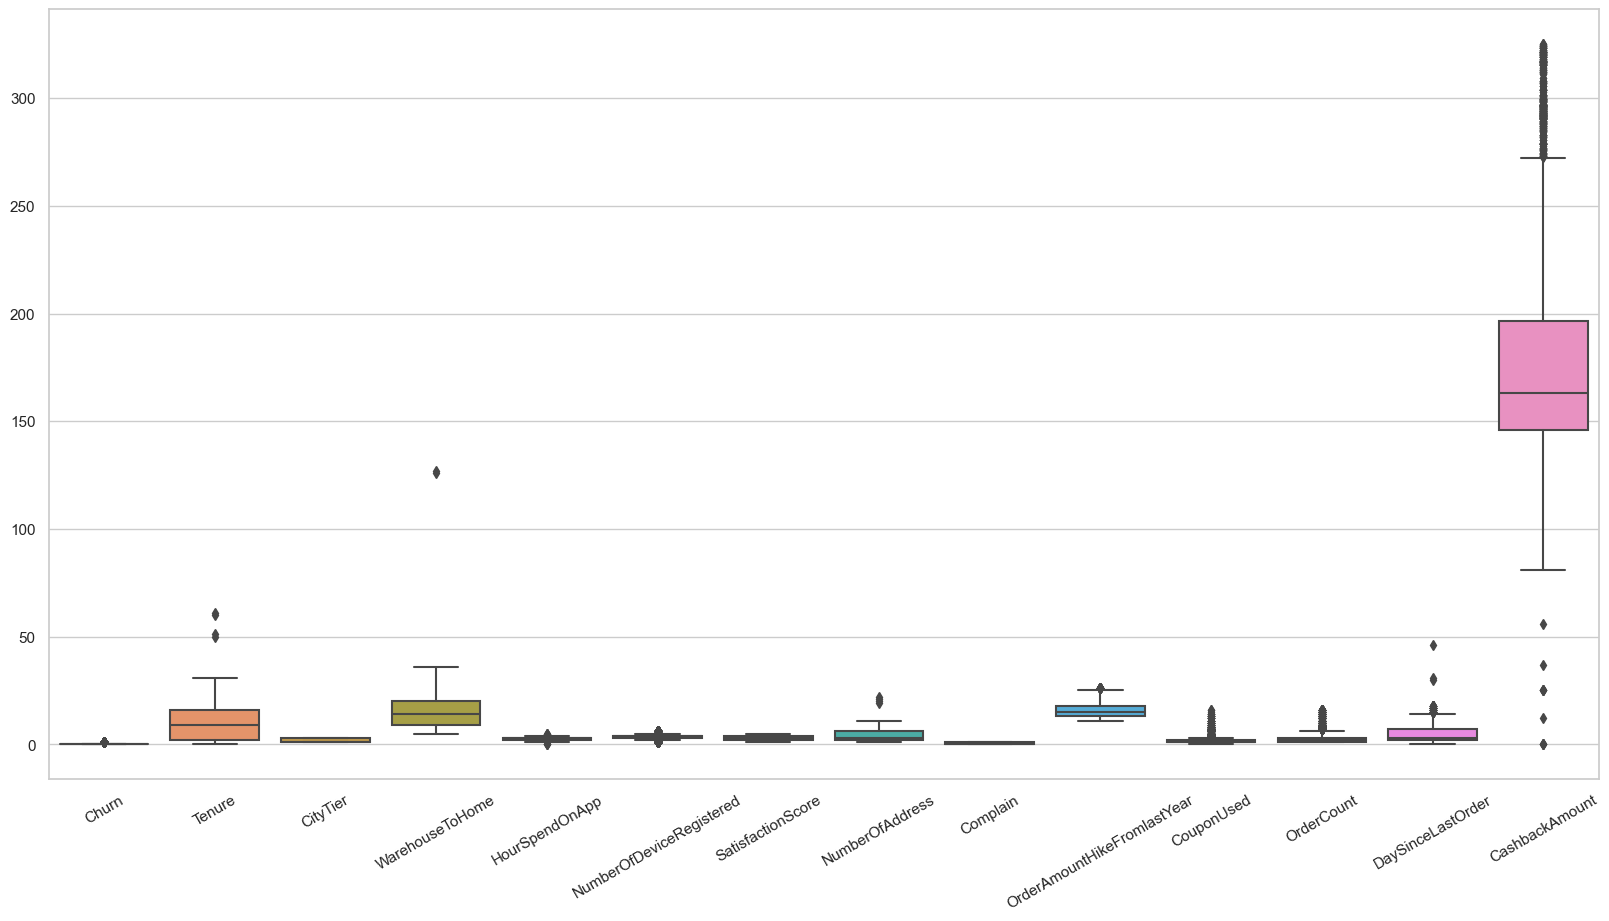

In [8]:
sns.set(style='whitegrid', palette='RdBu')

fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(data=df)

plt.xticks(rotation=30)

plt.show()

cat = df.select_dtypes(include='object').columns #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('Churn')
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

We use Interquartile Range (IQR) method to treat outliners

In [9]:
obj = df.select_dtypes(include='object').columns #select names of all cols that are obj type
num = list(df.select_dtypes(exclude='object').columns) #select name of all cols that aren't obj type
num.remove('Churn') #Churn should not be treated for outliners, we need to analyze it later

In [10]:
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

Check if we still have outliers or not

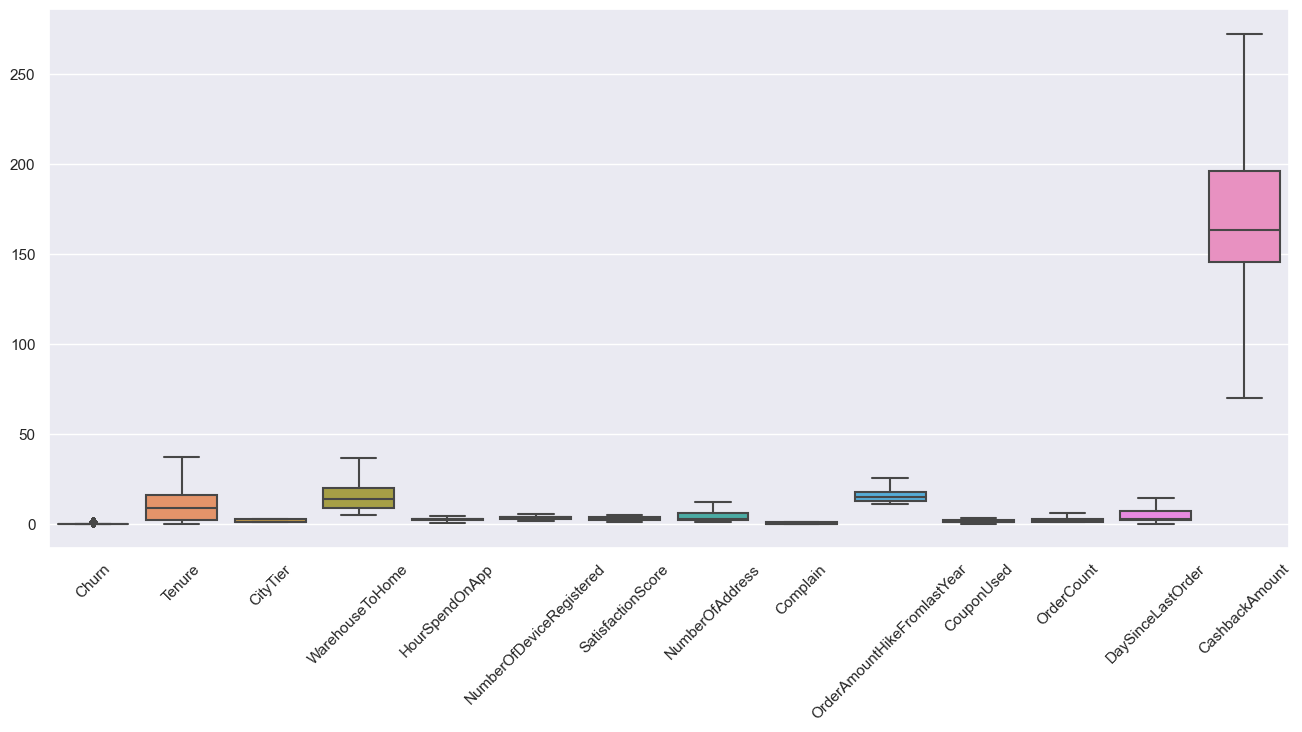

In [11]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

This looks great, our data don't have outliners

### Missing values

In [12]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

As you can see, we have a lot of missing values, we will replace them with means and medians.

In [13]:
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(round(df.OrderAmountHikeFromlastYear.mean()), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [14]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Categorical variables

In [15]:
for col in obj:
    print(df[col].value_counts())

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
Male      3384
Female    2246
Name: Gender, dtype: int64
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


let's see these variables corresponding to churn value

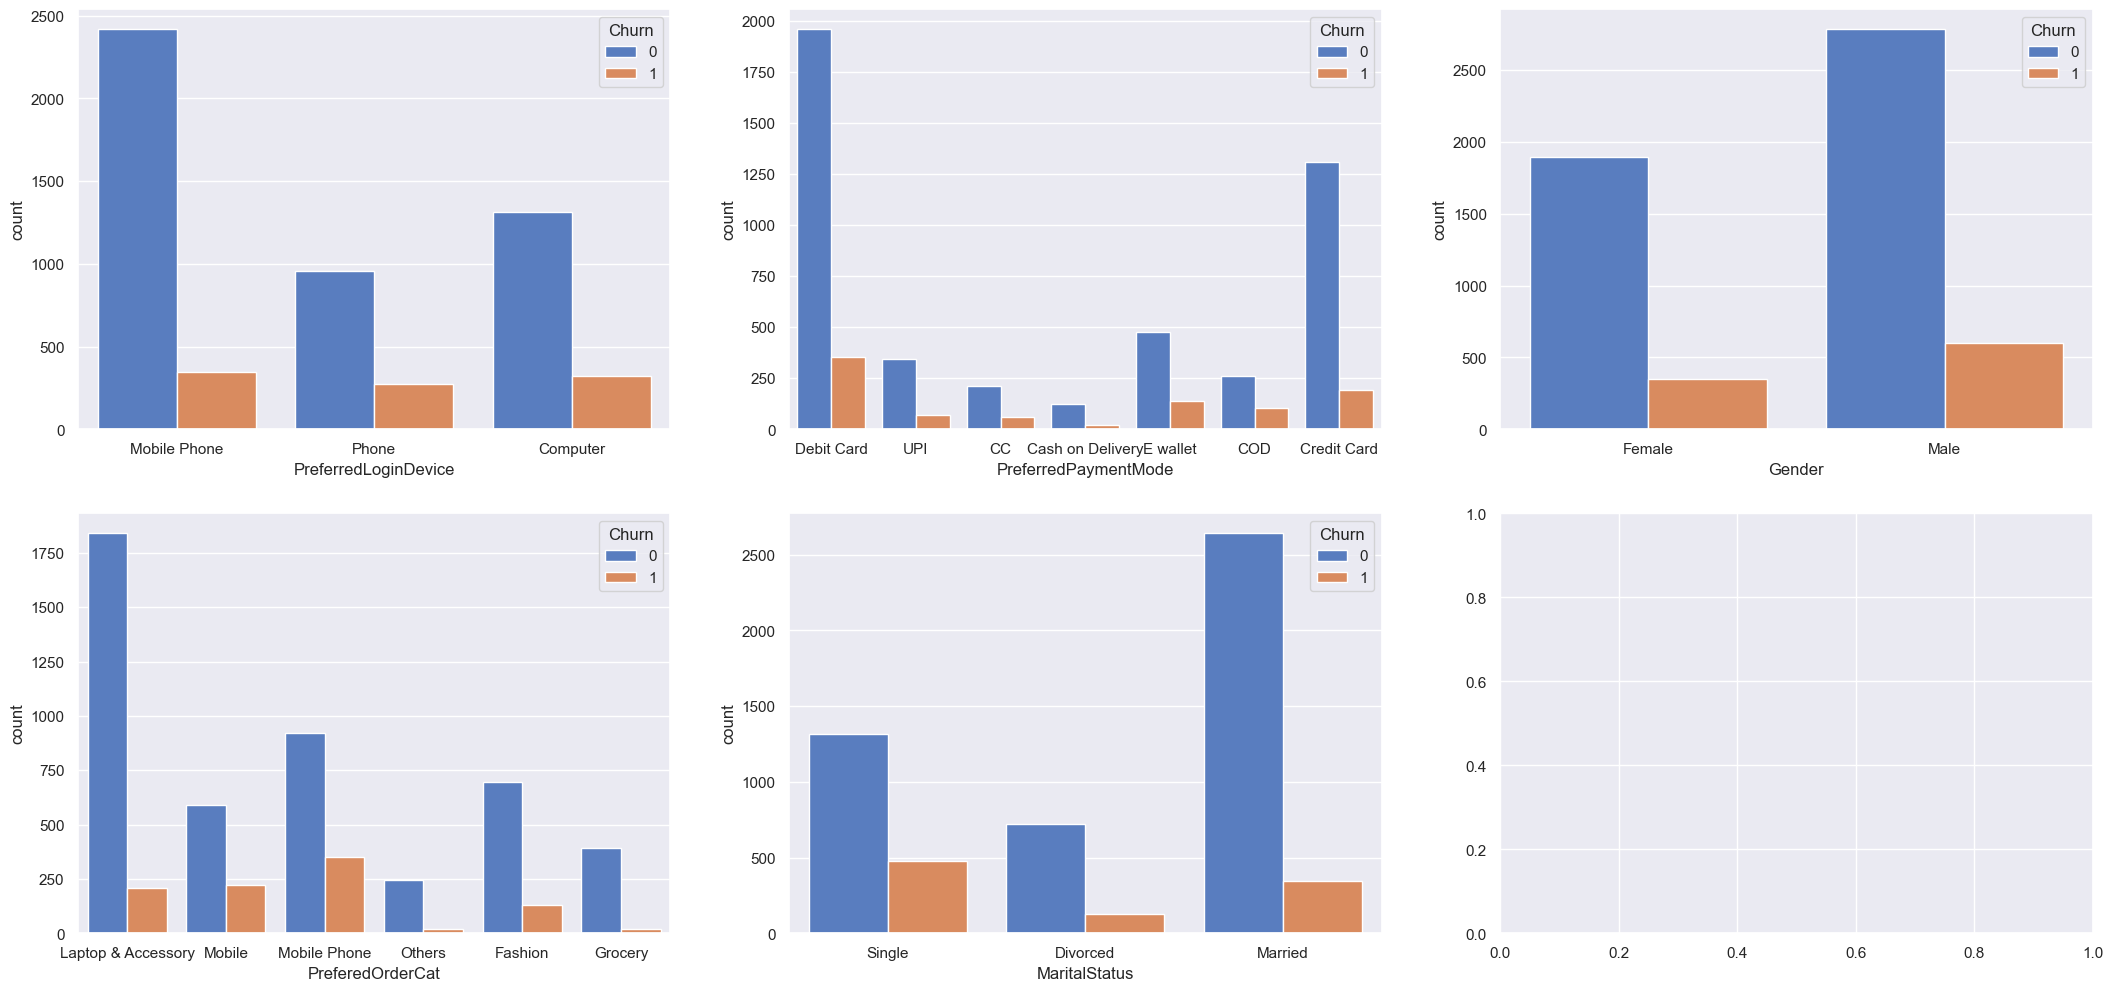

In [16]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))

for col,subplot in zip(obj, ax.flatten()):
    sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

Using pie chart to get more details from dataset

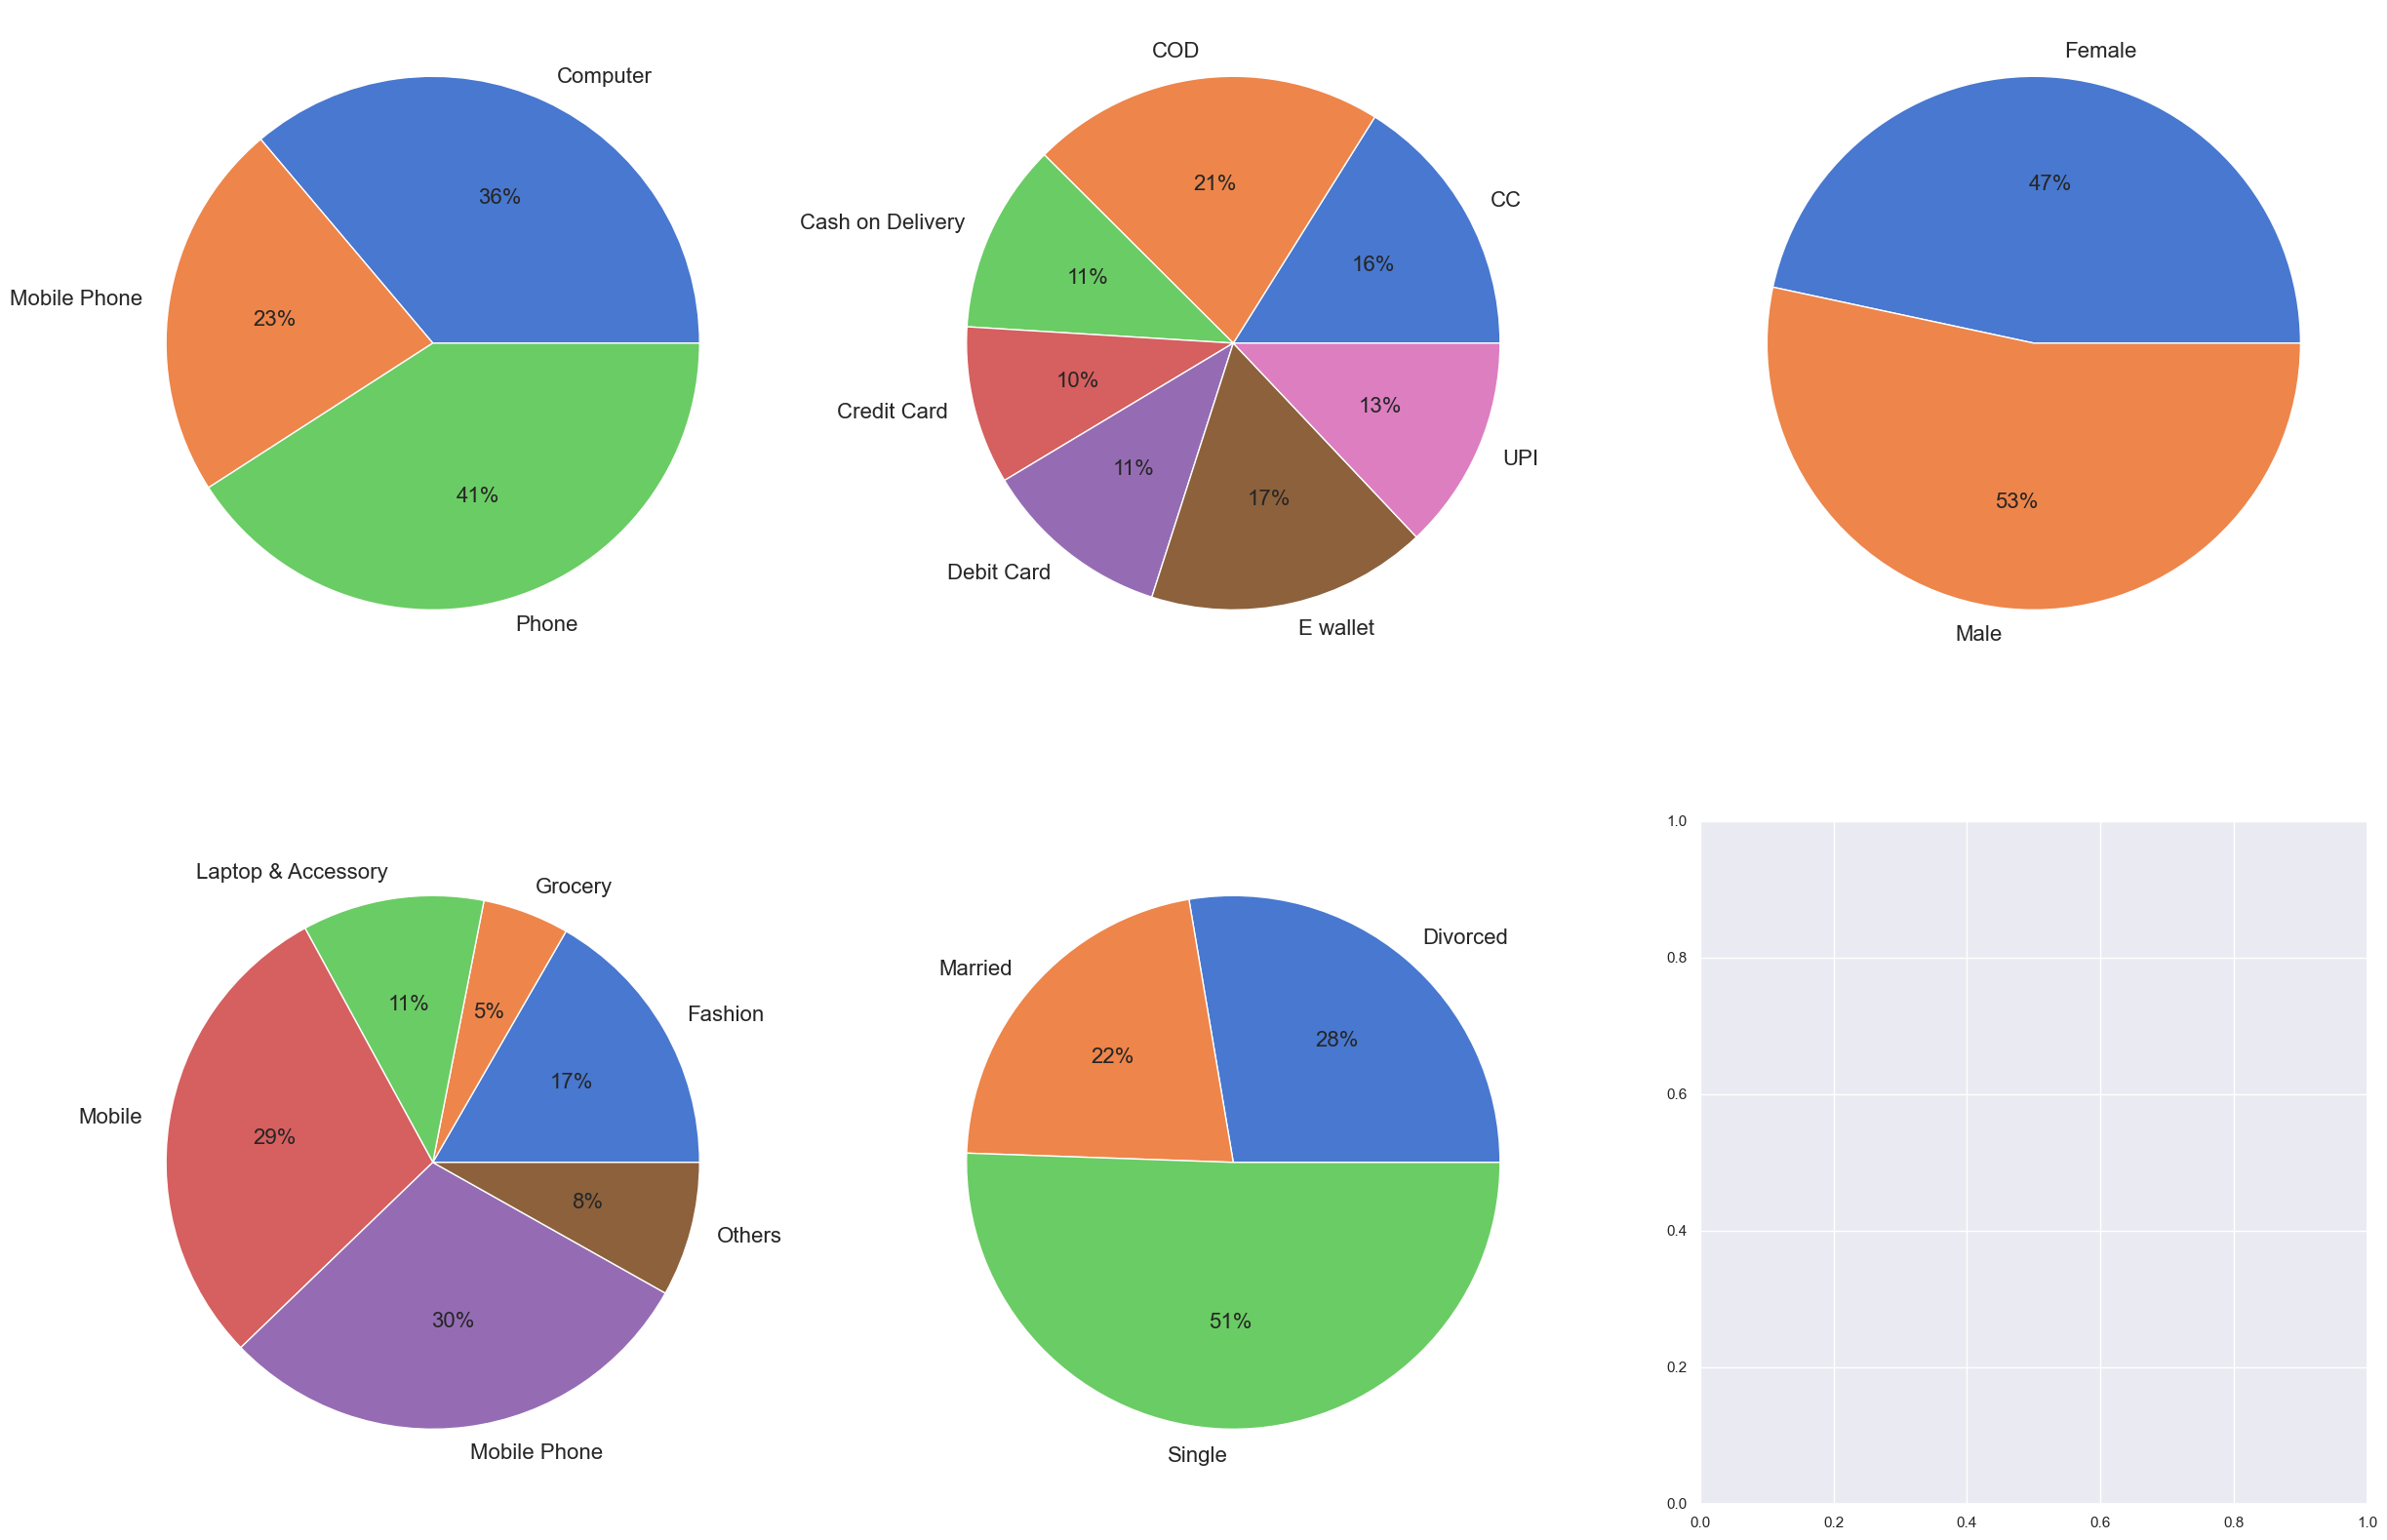

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.rcParams['font.size'] = '16'
for col,subplot in zip(obj, ax.flatten()):
    #calculate percent churn 
    temp = df.groupby(by=df[col]).Churn.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 16})

## Numerical variable


# Visualise distributions



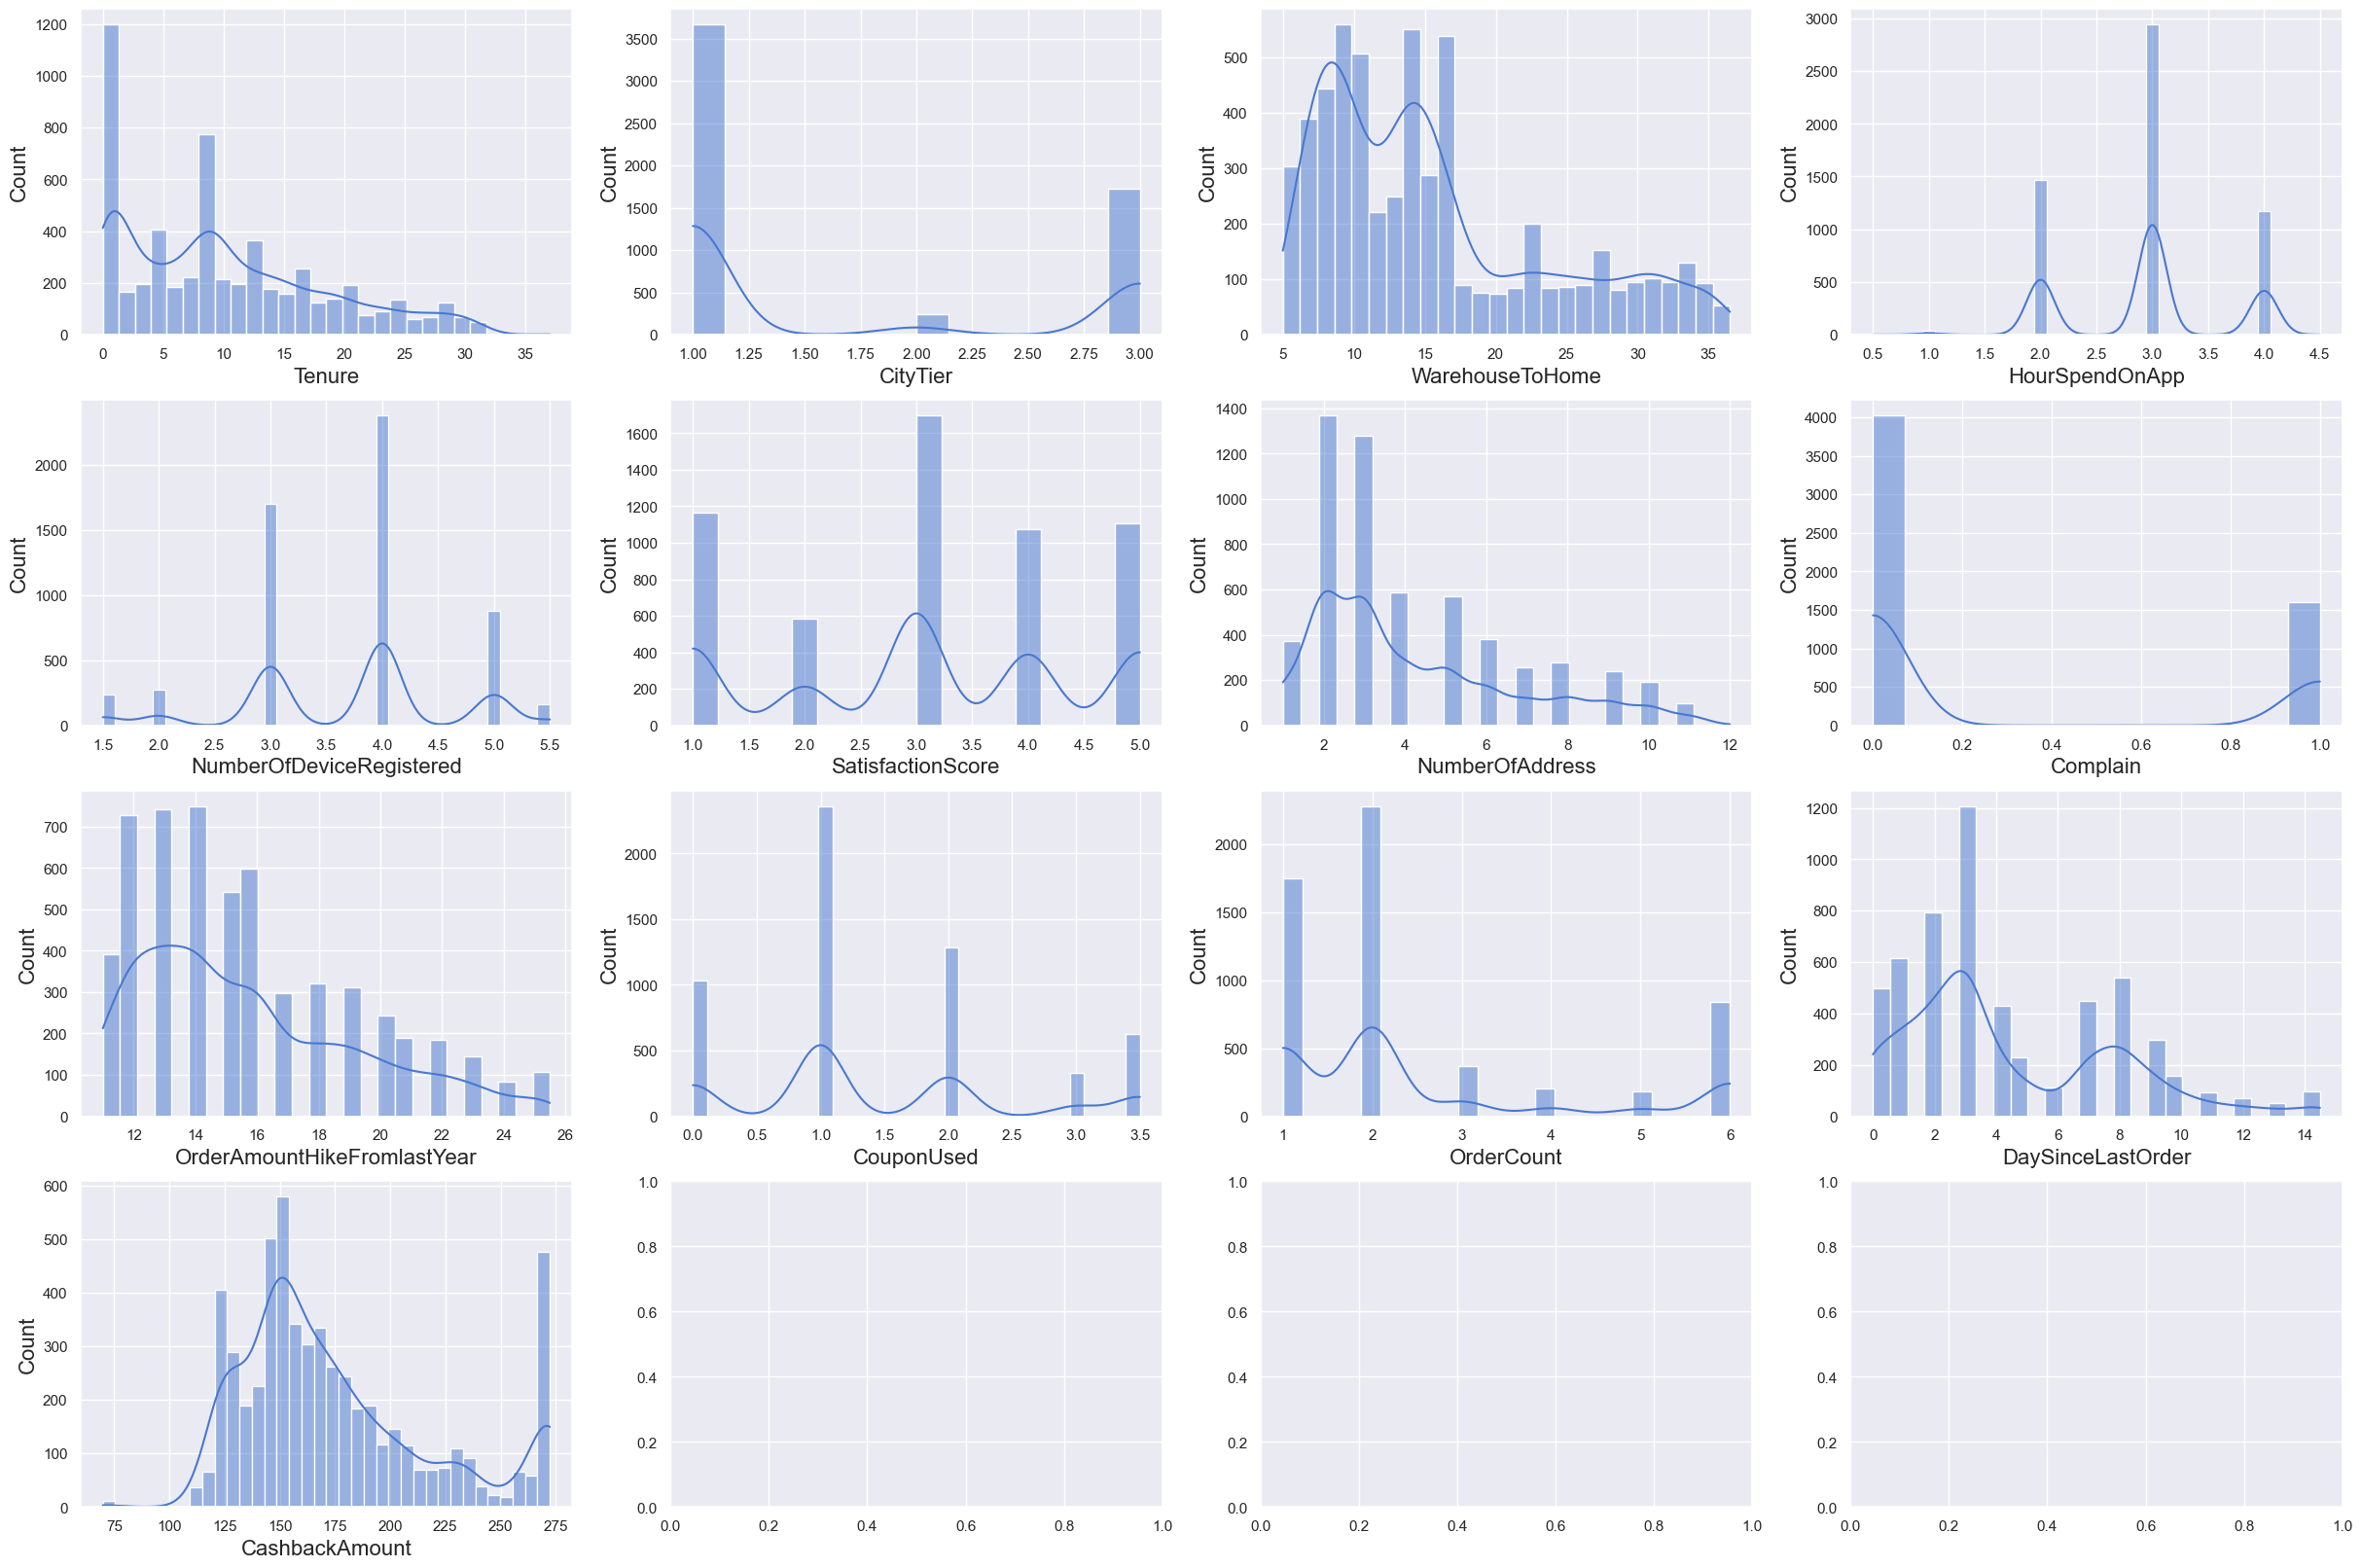

In [18]:
fig, ax = plt.subplots(4, 4, figsize=(30, 20))
plt.rcParams['font.size'] = '16'
for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df[i], kde = True, ax=subplot)

Using line chart to find % churn 

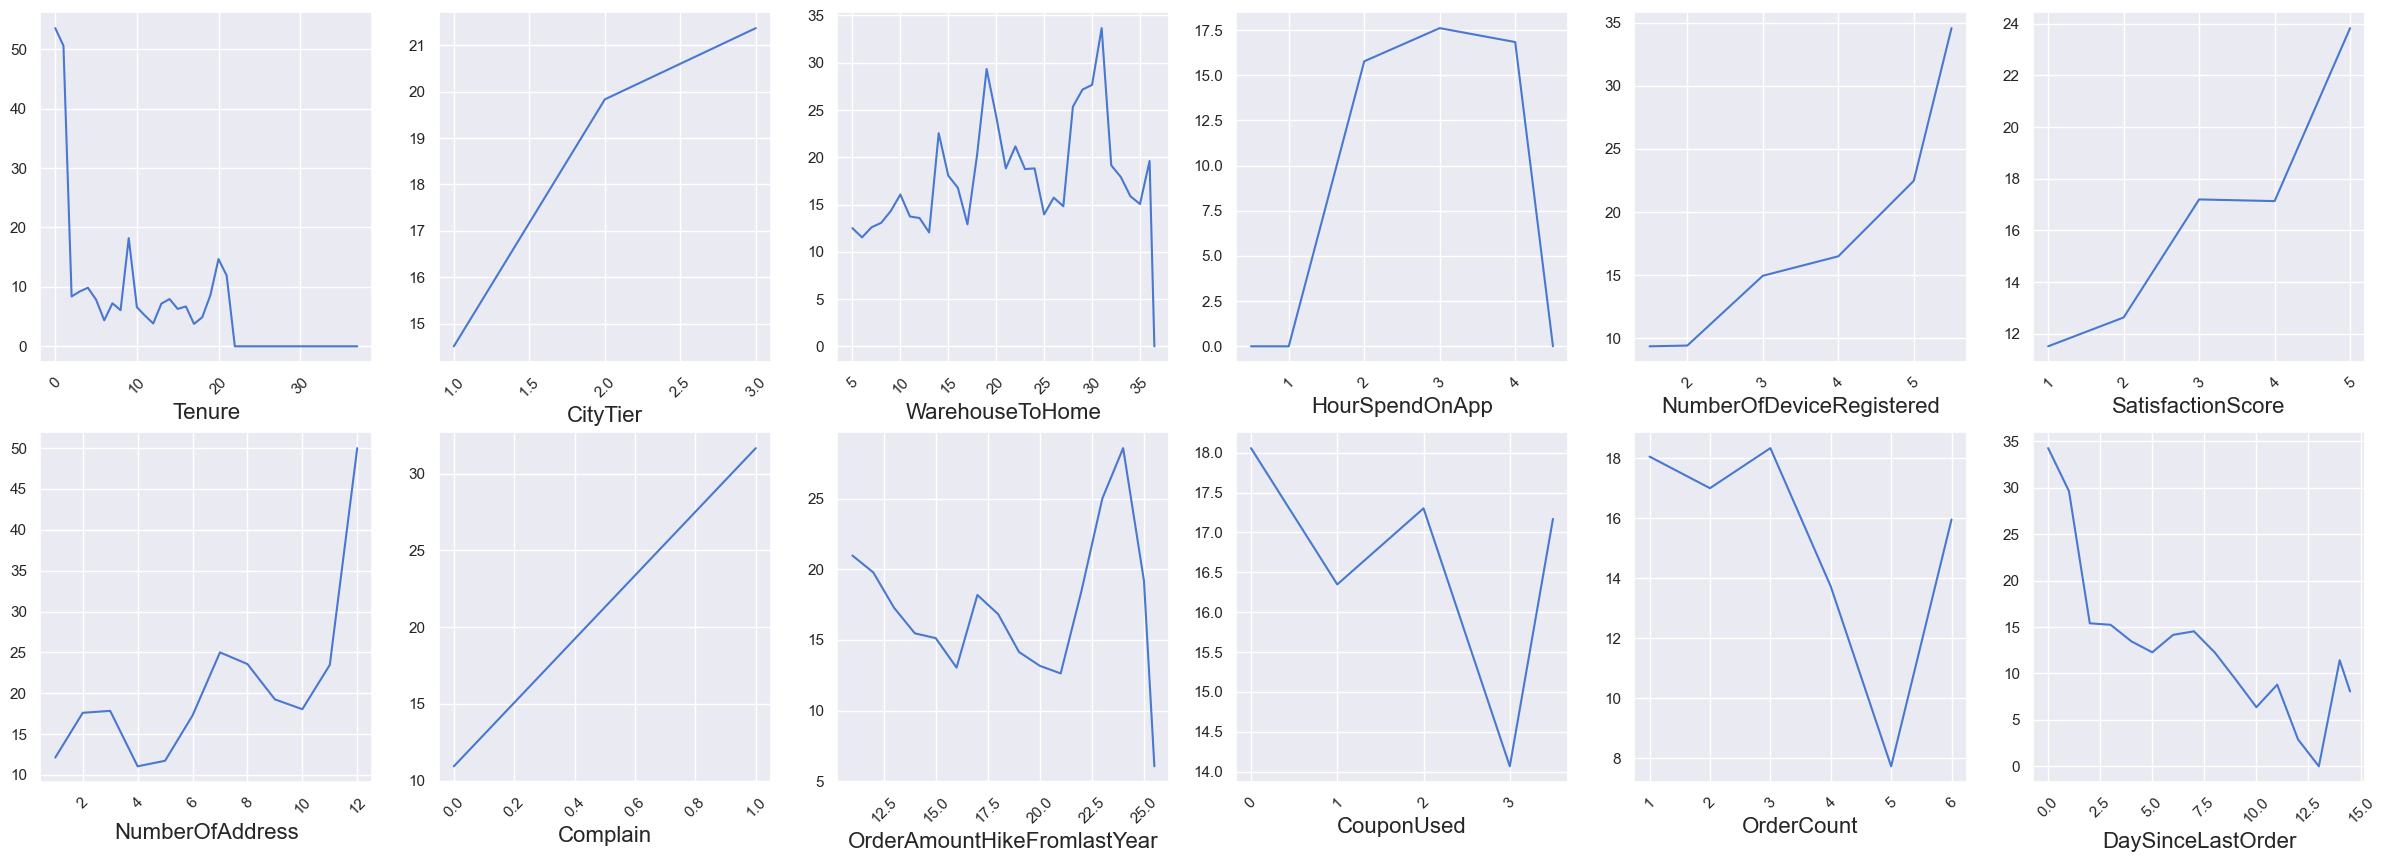

In [19]:
fig, ax = plt.subplots(2, 6, figsize=(30, 10))
for col,subplot in zip(num, ax.flatten()):
    temp = df.groupby(by=df[col]).Churn.sum()
    total = df.value_counts(col).sort_index()
    res1 = temp/total*100
    sns.lineplot(x = res1.index, y = res1.values, ax=subplot, )
    subplot.tick_params(axis='x',labelrotation=45)

## Bivariate Analysis

In the bivariate analysis, we look at two variables to see how they relate to each other. We use something called the correlation coefficient to do this. If the correlation value is close to 1, it means they have a positive relationship. If it's close to -1, they have a negative relationship. If it's around zero, there isn't much of a relationship.

<Axes: >

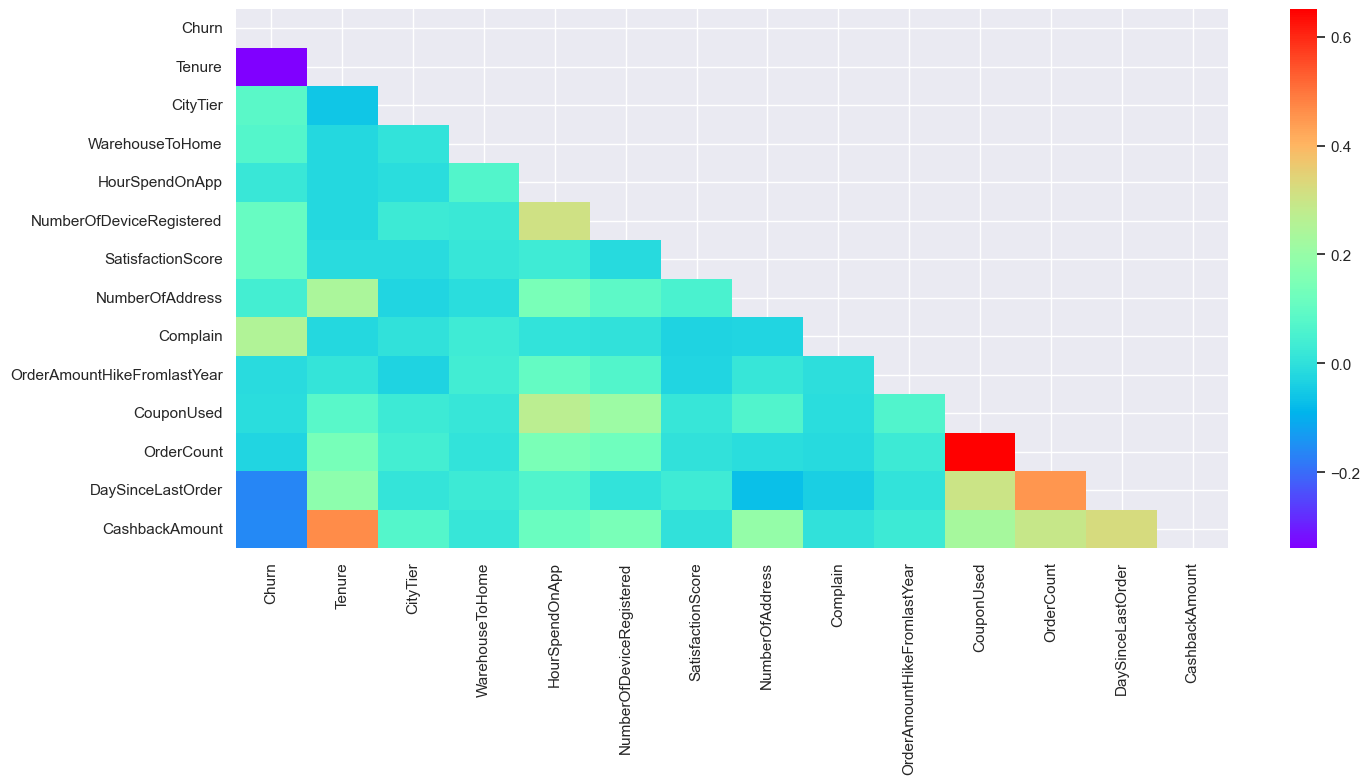

In [20]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(df.corr(method='pearson'), mask=mask, cmap='rainbow')

There is a clear link between how long someone has been a customer (tenure) and the amount of cashback they get. There is also a strong link between the number of coupons used and the number of orders placed. While tenure and complaints can somewhat affect customer churn, the other factors don't really have much impact.

## Classification

After finishing data cleaning and analysis, we'll now look at classification. We'll use different classification algorithms to find the best fit, with the help of sci-kit learn's pipeline and GridsearchCV. So, let's start by importing all the required libraries.

In [23]:
pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.1/99.8 MB 2.0 MB/s eta 0:00:51
                                              0.6/99.8 MB 6.1 MB/s eta 0:00:17
                                              1.7/99.8 MB 12.2 MB/s eta 0:00:09
     -                                        3.1/99.8 MB 16.7 MB/s eta 0:00:06
     -                                        4.8/99.8 MB 20.6 MB/s eta 0:00:05
     --                                       6.3/99.8 MB 22.2 MB/s eta 0:00:05
     ---                                      7.5/99.8 MB 22.8 MB/s eta 0:00:05
     ---                                      9.0/99.8 MB 24.0 MB/s eta 0:00:04
     ----                                    10.4/99.8 MB 28.5 MB/s eta 0:00:04
     ----                                    11.9/99.8 MB 31.2 MB/s eta 0:00:03
     -----                                   13.1/99.8 MB 31.2 MB/s eta 0:00:03
     -----                                   14.6/

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


Before inputting them into the algorithms, we'll encode our numerous variables with categorical values.

In [25]:
enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col]=enc.fit_transform(df[col])

Splitting the data into train and test sets

In [26]:
X_train, X_test,y_train, y_test = train_test_split(df.drop('Churn', axis=1), df.Churn)

We are constructing a custom switcher class that will function with any estimator passed through GridsearchCV.

In [27]:
class my_classifier(BaseEstimator,):
    def __init__(self, estimator=None):
        self.estimator = estimator
    def fit(self, X, y=None):
        self.estimator.fit(X,y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X,y)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)

Now, we will define our pipeline



In [28]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', my_classifier())])

Define parameter space



In [29]:
parameters = [
              {'clf':[LogisticRegression(max_iter=1000)],
               'clf__C':[0.001,0.01,.1,1],
               'clf__solver':['lbfgs','liblinear']
               },
             {'clf':[RandomForestClassifier()],
             'clf__criterion':['gini','entropy'], 
             },
             {
               'clf':[DecisionTreeClassifier()],
             'clf__criterion':['gini','entropy'],
             },
             {
              'clf':[XGBClassifier()],
             'clf__learning_rate':[0.01,0.1,0.2,0.3],
             'clf__reg_lambda':[0.01,0.1,1],
             'clf__reg_alpha': [0.01,0.1,0,1],
             }]

The code snippet above sets hyper-parameters for each estimator to improve the fit.

Next, we'll feed the pipeline and parameter into GridsearchCV.

In [30]:
grid = GridSearchCV(pipe, parameters, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', my_classifier())]),
             param_grid=[{'clf': [LogisticRegression(max_iter=1000)],
                          'clf__C': [0.001, 0.01, 0.1, 1],
                          'clf__solver': ['lbfgs', 'liblinear']},
                         {'clf': [RandomForestClassifier()],
                          'clf__criterion': ['gini', 'entropy']},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__criterion': ['gini', 'e...
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                          'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
                          'clf__reg_alpha': [0.01, 0.1, 0, 1],
                          'clf__reg_lambda': [0.01, 0.1, 1]}])

In [31]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## Training Score

In [32]:
grid.best_score_

0.9609175804144815

Predicting values for test set



In [33]:
y_pred = grid.predict(X_test,)


## Confusion matrix



<Axes: >

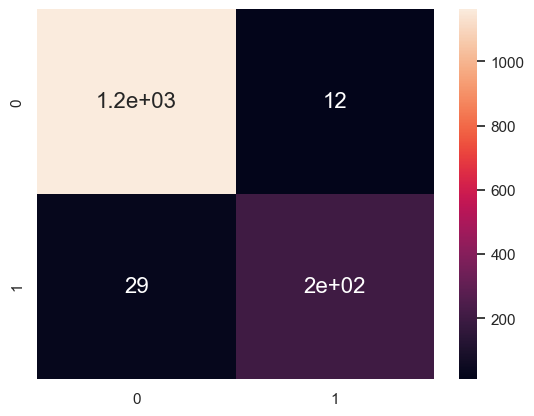

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


F1 score on the test set



In [35]:
print(f1_score(y_test,y_pred))


0.9090909090909092


An XGboost model calculates feature importance automatically. This identifies the most influential feature in our predictions.

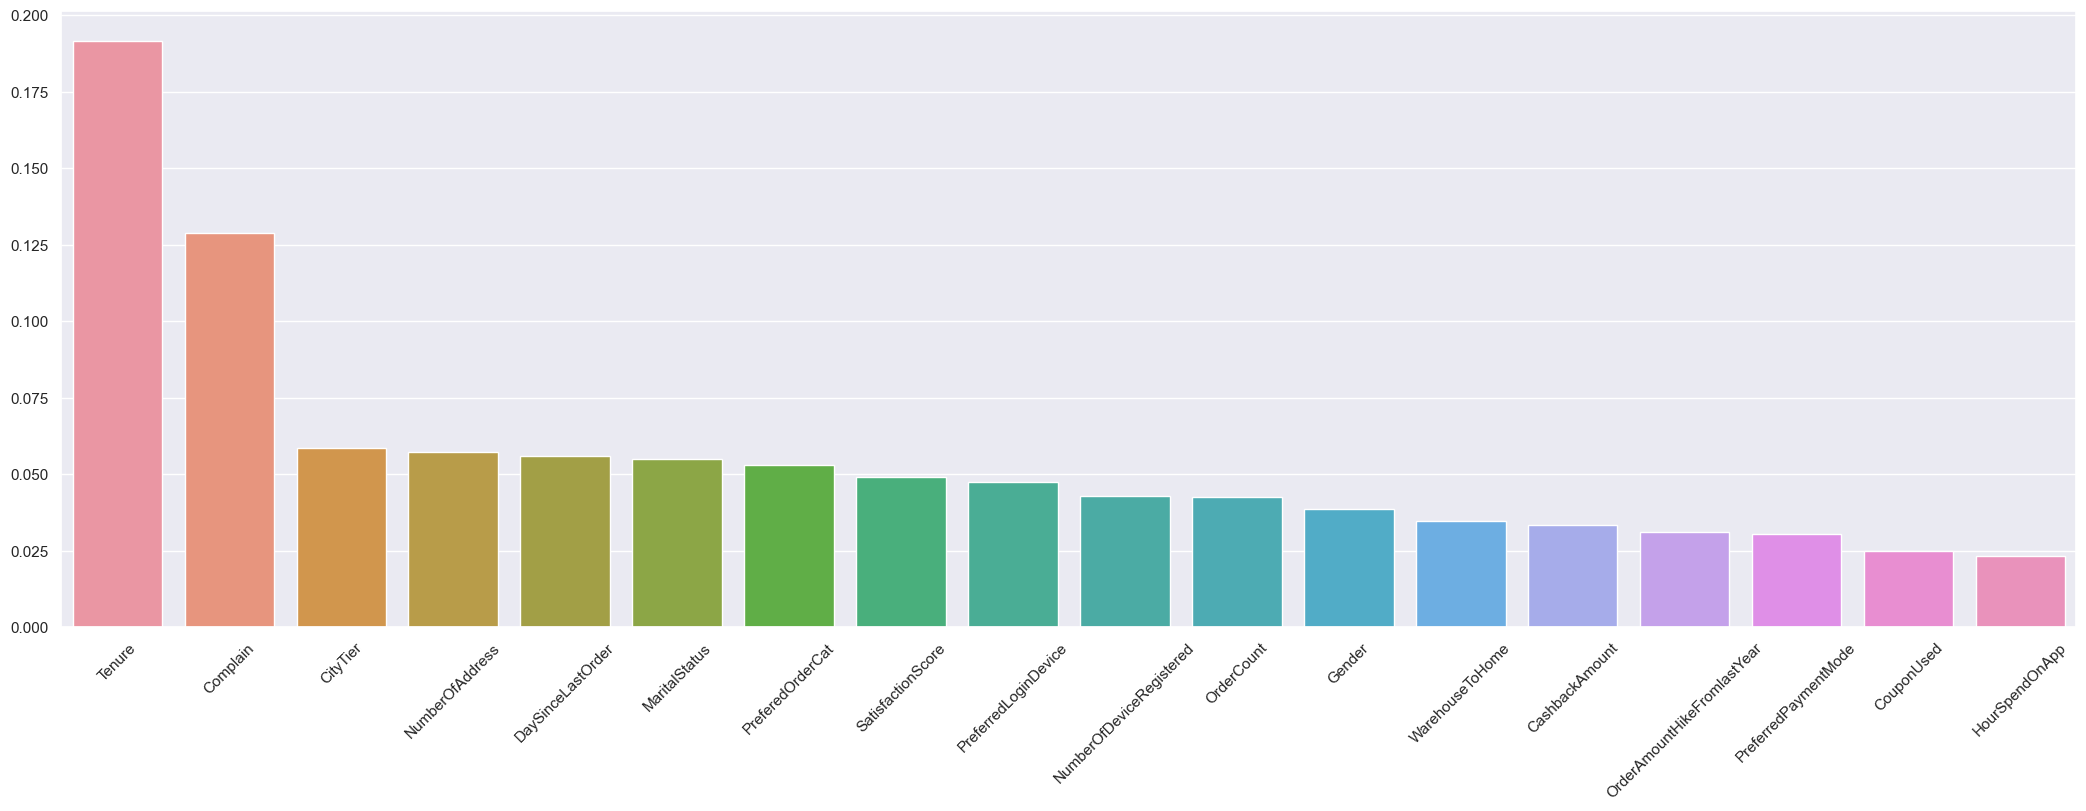

In [36]:
feature_array = grid.best_estimator_[-1].feature_importances_
importance = dict(zip(df.drop('Churn',axis=1).columns,feature_array))
importance = dict(sorted(importance.items(), key= lambda item:item[1],reverse = True) )
fig, ax = plt.subplots(figsize=(26,8))
sns.barplot(x=list(importance.keys()), y=list(importance.values()))
plt.tick_params(axis='x', labelrotation=45)
plt.show()